# Linear Regression model using SciKit learn

In [1]:
import pandas as pd #import pandas pandas lib

In [2]:
import seaborn as sns #import seaborn lib

In [3]:
%matplotlib inline

In [4]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col = 0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### 1. TV, Radio, Newspaper = Advertising dollars in 1000s = "features" for/of our model
### 2. 'Sales' = Total sales in 1000s = "Result"/"Response" of our model 
### 3. What else do we know?
#### Because the response variable is continous, this is a regression problem (i.e a regression model should be better equipped to make predictions)
#### There are 200 rows , and each row corrsponds to the observation in a single market

## I was curious to know whether there was a possible corelation between sales and TV adv dollars. So I plotted it. 

## As you can see, there seems to be a 'possible' correlation between them. 

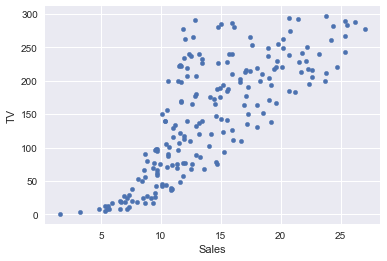

In [5]:
data[['TV', 'Sales']].sort_index().plot(y= 'TV', x = 'Sales', kind = 'scatter')

### Now lets use seaborn (Python library for viz, built on top of matplotlib) to do a more wholesome analysis. 

### My attempt to visualize the relationship between the features and the response using a scatterplot. 

#### Often we want to see the relationship between features and the response - hence we plot them all below. 

#### NOTE: We specify the: kind = 'reg', parameter in the seaborn plot to have seaborn draw the line (gradient descent) for us. 

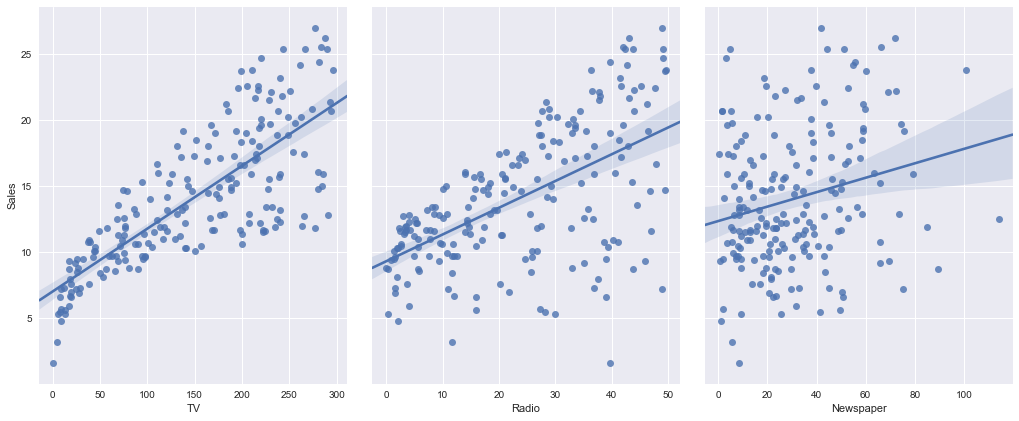

In [37]:
sns.pairplot(data, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = 'Sales', size = 6, aspect = 0.8, kind = 'reg')

## Notice how the linear relatioship is most prominent in the following order- TV, Radio, Newspaper. <u>This also demonstartes that the TV adv spending feature makes it the best candidate for our linear model.</u> 

### This also aligns with my initial hypothesis that in today's world(where a lot more people are watching TV rather than print or radio), money spent on TV advertising could be more closely associated with increase in Sales.  

## <U>Linear Regression </U> 
## PROS: fast, no tuning required, highly interpretable, well-understood 
## CONS: unlikely to produce the best predictive accuracy (since it presumes a linear relationship between the features and response)

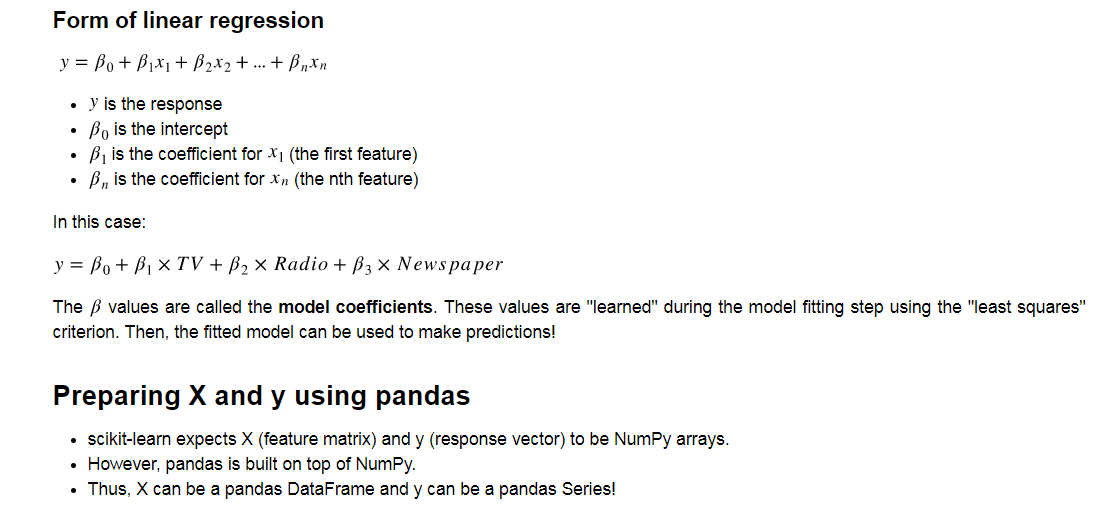

In [6]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### To double check how many of our fature values are null, I run a quick check. 

In [11]:
len(data[data['TV'].isnull()])

0

In [27]:
#let's create a data frame consiting of the feature values alone (a subset of 'data' dataframe)
X = data[['TV', 'Radio', 'Newspaper']]

X.head() #test if it worked

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [28]:
X.shape #Verify all the rows/values were carried over

(200, 3)

In [23]:
#Now lets set the y value series to Sales. REMEMBER Y/Response needs to be of
#Series data type for SciKit
y = data['Sales']

y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [26]:
#let's verify that y/Sales data type is a series 

type(y)

pandas.core.series.Series

## Split x and y into training and test sets

In [30]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [34]:
#default split is 75% for training and 25% for testing
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


### Linear regression in scikit-learn

In [36]:
#import model
from sklearn.linear_model import LinearRegression

#instantiate
linreg = LinearRegression()

#Fit the model to the training data (i.e. Learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Interpreting the model coefficients (the beta value in the lin reg formula!)

In [37]:
#print the intercept and coefficients. Here, beta0 = 2.87696...
print (linreg.intercept_)
print(linreg.coef_)

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [41]:
#pair the feature names with the coefficients. You can also take a peek at the 
#coefficents using List fun

list(zip(feature_cols, linreg.coef_))

[('TV', 0.046564567874150281),
 ('Radio', 0.17915812245088836),
 ('Newspaper', 0.0034504647111804347)]

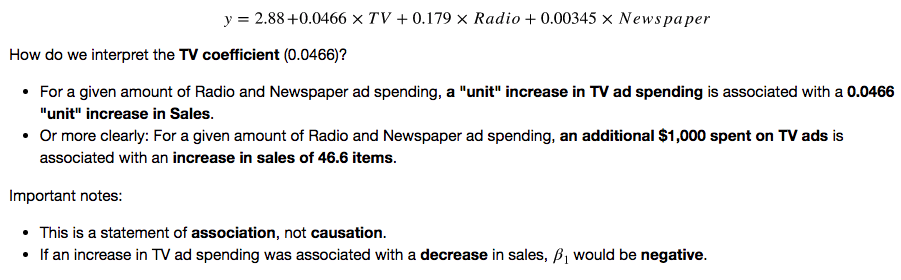

## Making Predictions!!

In [42]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

#### Not yet :( We still need to identify the evaluation metric for our linear model (match actualu values against our predicted values). Evaluation metric = the error analysis methodlogy that we will use to judge/tweak/update our linear model.


### Model evaluation metrics for regression
#### Evaluation metrics for classification problems, such as accuracy, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.
#### Let's create some example numeric predictions, and calculate three common evaluation metrics for #### regression problems:

In [43]:
# define true and predicted response values (make this up - but 
# keep it loosely close to our expected 'y' values)

true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

### Mean Absolute Error (MAE) is the mean of the absolute value of the errors

In [44]:
# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0


### Mean Squared Error (MSE) is the mean of the squared errors

In [45]:
# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0


### Mean Squared Error (RMSE) is the square root of the mean of the squared errors

In [49]:
import numpy as np
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.2474487139


#### Comparing these metrics:

##### 1. MAE is the easiest to understand, because it's the average error.
##### 2. MSE is more popular than MAE, because MSE "punishes" larger errors.
##### 3. RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

##### I like RMSE personally. Gives you a tangible error value, has square root - is cool. 

### Computing the RMSE for our Sales predictions

In [50]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.40465142303


### This means, using RMSE as eval metric, our linear model has a error range of 1.4 units. Not bad, but can we make our model better and minimize our error? 

#### Yes, we can! We do this by being more picky about which features (TV, Radio, Newspaper) we use in our model. Using all 3, we got the value above. 

#### What if we only used 2 features? Or what if we used only 1 feature? 

In [54]:
#Let's try using the only the 'TV' and 'Radio' features

# X has our fetaures in matrix/dataframe format - as required by scikit
X = data[['TV', 'Radio']]

# y has our response values, in array format - as required by scikit
y = data['Sales']

In [56]:
#we use train test split to have scikit give us the split of train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [57]:
# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

In [59]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.38790346994


We got an error range of 1.38 ! This is hence the "Better" model (in this we only cosidered the tv and radio features). 

The RMSE decreased when we removed Newspaper from the model. (Error is something we want to minimize, so a lower number for RMSE is better.) Thus, it is unlikely that this feature is useful for predicting Sales, and should be removed from the model.

#### Lastly, lets try a model with only TV as the feature

In [62]:
X = data[['TV']]
y = data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

3.2109297077


This was a bad idea! Our error shot up to 3.21, which means this is the worst model of the 3. Don't use it!